In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


2025-03-23 12:22:37.997044: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import pickle
# Load df1 from pickle file
with open("eda_results.pickle", "rb") as f:
    df1_loaded = pickle.load(f)

In [6]:
df1_loaded

,Date,Price,Open,High,Low,Vol,Change %,AvgPrice_5,AvgPrice_30,AvgPrice_365,...,Return_365,MovingAvg_1,MovingAvg_30,MovingAvg_365,Upper_Band_5,Lower_Band_5,Upper_Band_30,Lower_Band_30,Upper_Band_365,Lower_Band_365
0,2018-05-26,0.6088,0.6056,0.6247,0.5989,99110000.0,0.0052,NaN,NaN,NaN,...,NaN,0.6088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-27,0.6046,0.6088,0.6119,0.5988,95150000.0,-0.0068,NaN,NaN,NaN,...,NaN,0.6046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-28,0.5476,0.6047,0.6075,0.5460,158340000.0,-0.0943,NaN,NaN,NaN,...,NaN,0.5476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-29,0.5994,0.5476,0.6088,0.5444,155950000.0,0.0945,NaN,NaN,NaN,...,NaN,0.5994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-30,0.5938,0.5994,0.6255,0.5786,132830000.0,-0.0093,0.59084,NaN,NaN,...,NaN,0.5938,NaN,NaN,0.640475,0.541205,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2024-05-22,0.5268,0.5372,0.5382,0.5236,509460000.0,-0.0194,0.52652,0.519970,0.566010,...,0.141001,0.5268,0.519970,0.566010,0.549979,0.503061,0.544505,0.495435,0.708964,0.423055
2188,2024-05-23,0.5288,0.5269,0.5456,0.5091,948100000.0,0.0038,0.52804,0.519447,0.566184,...,0.136960,0.5288,0.519447,0.566184,0.550749,0.505331,0.542438,0.496455,0.708800,0.423569
2189,2024-05-24,0.5358,0.5288,0.5372,0.5169,513880000.0,0.0133,0.53326,0.519723,0.566411,...,0.182520,0.5358,0.519723,0.566411,0.543424,0.523096,0.543308,0.496139,0.708568,0.424254
2190,2024-05-25,0.5416,0.5359,0.5425,0.5334,246380000.0,0.0109,0.53404,0.520263,0.566652,...,0.193740,0.5416,0.520263,0.566652,0.546292,0.521788,0.545095,0.495432,0.708340,0.424963


# prompt: drop null values

df1_loaded= df1_loaded.dropna()

In [17]:
# Select relevant columns for training
features = [
    "Price", "Open", "High", "Low", "Vol",
    "AvgPrice_5", "AvgPrice_30", "AvgPrice_365",
    "Ratio_5_30", "Ratio_5_365", "Ratio_30_365",
    "AvgVolume_5", "AvgVolume_30", "AvgVolume_365",
    "Ratio_Vol_5_30", "Ratio_Vol_5_365", "Ratio_Vol_30_365",
    "MovingAvg_1", "MovingAvg_30", "MovingAvg_365",
    "Upper_Band_5", "Lower_Band_5",
    "Upper_Band_30", "Lower_Band_30",
    "Upper_Band_365", "Lower_Band_365"
]

df_selected = df1_loaded[features]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)


In [11]:
df1_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2192 non-null   datetime64[ns]
 1   Price                2192 non-null   float64       
 2   Open                 2192 non-null   float64       
 3   High                 2192 non-null   float64       
 4   Low                  2192 non-null   float64       
 5   Vol                  2192 non-null   float64       
 6   Change %             2192 non-null   float64       
 7   AvgPrice_5           2188 non-null   float64       
 8   AvgPrice_30          2163 non-null   float64       
 9   AvgPrice_365         1828 non-null   float64       
 10  Ratio_5_30           2163 non-null   float64       
 11  Ratio_5_365          1828 non-null   float64       
 12  Ratio_30_365         1828 non-null   float64       
 13  AvgVolume_5          2188 non-nul

In [19]:
def create_sequences(data, target_index, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])  # 30 previous time steps
        y.append(data[i + seq_length, target_index])  # Target is next Price
    return np.array(X), np.array(y)

# Define sequence length
SEQ_LENGTH = 30

# Create sequences (Target: Price at index 0)
X, y = create_sequences(df_scaled, target_index=0, seq_length=SEQ_LENGTH)

# Train-Test Split
split = int(0.8 * len(X))  # 80% train, 20% test
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")


Train Shape: (1729, 30, 26), Test Shape: (433, 30, 26)


In [21]:
# Define LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1)  # Predicting the "Price"
])

# Compile Model
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

# Train Model
history = model.fit(
    X_train, y_train, 
    epochs=50, batch_size=32, 
    validation_data=(X_test, y_test), 
    verbose=1
)


Epoch 1/50


/Users/admin/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: nan - 

In [23]:
# Predict on Test Data
y_pred = model.predict(X_test)

# Reverse Scaling
y_pred_actual = scaler.inverse_transform(
    np.column_stack((y_pred, np.zeros((y_pred.shape[0], df_selected.shape[1] - 1))))
)[:, 0]

y_test_actual = scaler.inverse_transform(
    np.column_stack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df_selected.shape[1] - 1))))
)[:, 0]


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


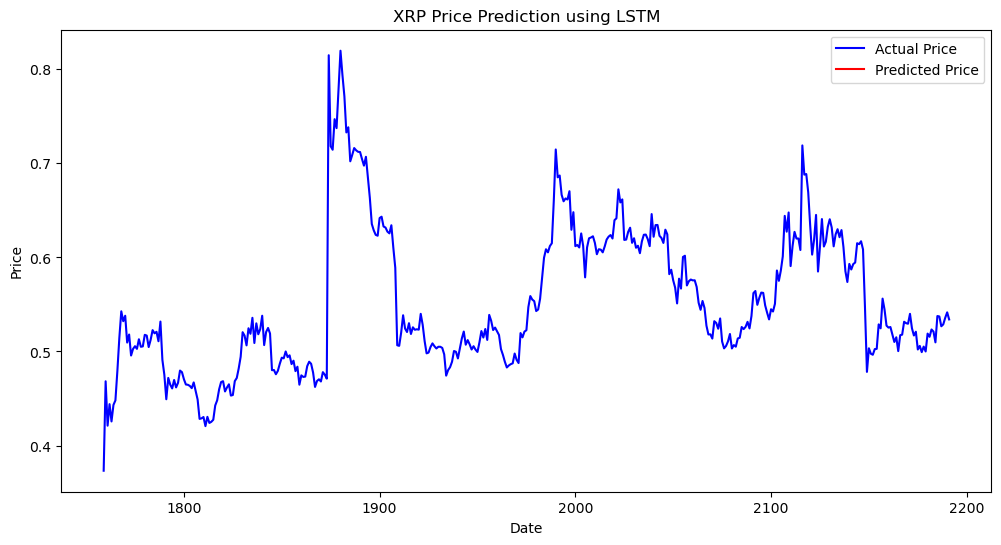

In [27]:
# Display Predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df1_loaded.index[split + SEQ_LENGTH:], y_test_actual, label="Actual Price", color="blue")
plt.plot(df1_loaded.index[split + SEQ_LENGTH:], y_pred_actual, label="Predicted Price", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("XRP Price Prediction using LSTM")
plt.show()


In [29]:
model.save("lstm_xrp_model.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained LSTM model
model = load_model("lstm_xrp_model.h5")

# Predict with new data
new_predictions = model.predict(X_test)


In [31]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)